In [121]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

# Plots LaTeX-Style
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [122]:
T = 1
h = 0.1
n = int(T/h) + 1

A = np.array([[0, 1], [-1, 0]])
Ak = np.array([[1, h],[-h, 1]])
Ck = np.array([1, 0]) # z = x
x0 = np.array([1, 1])

x_var = 0.1
z_var = 0.1
Q = np.array([[x_var, 0], [0, x_var]])
R = z_var

In [123]:
x_real = np.zeros((n, 2))
x_real[0] = x0
for i in range(1, n):
    x_real[i] = x_real[i-1] + h * A @ x_real[i-1]

x_pred = np.zeros((n, 2))
Cov_pred = np.zeros((n, 2, 2))

x_pred[0] = x0
Cov_pred[0] = Q

x_filt = np.zeros((n, 2))
Cov_filt = np.zeros((n, 2, 2))

x_filt[0] = x0
Cov_filt[0] = Q

z = np.zeros(n)
z[0] = Ck @ x0 + R * np.random.normal()

In [124]:
print(Cov_filt[0])

for i in range(1, n):
    x_pred[i] = Ak @ x_pred[i-1] # is noise missing?
    Cov_pred[i] = Ak @ Cov_pred[i-1] @ Ak.T + Q

    z[i] = Ck @ x_real[i] + R * np.random.normal()

    K = Cov_pred[i] @ Ck.T * 1/(Ck @ Cov_pred[i] @ Ck.T + R)
    x_filt[i] = x_pred[i] + K * (z[i] - Ck @ x_pred[i])
    Cov_filt[i] = Cov_pred[i] - K * Ck @ Cov_pred[i]

    print(Cov_filt[i])

[[0.1 0. ]
 [0.  0.1]]
[[ 0.06677741  0.        ]
 [-0.13422259  0.201     ]]
[[ 0.07518672  0.        ]
 [-0.22782328  0.30301   ]]
[[ 0.08023872  0.        ]
 [-0.32580138  0.4060401 ]]
[[ 0.08360926  0.        ]
 [-0.42649124  0.5101005 ]]
[[ 0.08601793  0.        ]
 [-0.52918358  0.61520151]]
[[ 0.08782497  0.        ]
 [-0.63352855  0.72135352]]
[[ 0.08923072  0.        ]
 [-0.73933634  0.82856706]]
[[ 0.09035543  0.        ]
 [-0.8464973   0.93685273]]
[[ 0.09127568  0.        ]
 [-0.95494557  1.04622125]]
[[ 0.09204255  0.        ]
 [-1.06464092  1.15668347]]


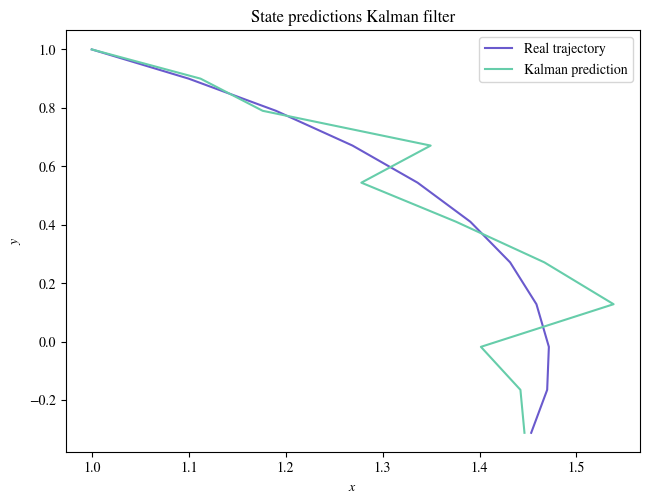

In [125]:
fig, ax = plt.subplots()
fig.tight_layout()

ax.plot(x_real[:,0], x_real[:,1], label='Real trajectory', color='slateblue')
ax.plot(x_filt[:,0], x_filt[:,1], label='Kalman prediction', color='mediumaquamarine')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('State predictions Kalman filter')
ax.legend()
plt.savefig('HW3_2_Kalman.png', dpi=300)
plt.show()